In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [13]:
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp37-cp37m-win_amd64.whl (437.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Processing c:\users\sr computer\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2\termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)


In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.7486 - accuracy: 0.4602 - val_loss: 0.5943 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7958 - val_loss: 0.5212 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7958 - val_loss: 0.5101 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7958 - val_loss: 0.5063 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7958 - val_loss: 0.5039 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7958 - val_loss: 0.5020 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7958 - val_loss: 0.5003 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4950 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy:

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([[0.25435734],
       [0.23557305],
       [0.23557305],
       ...,
       [0.23557305],
       [0.24602726],
       [0.25435734]], dtype=float32)

In [23]:
y_pred = y_pred.argmax(axis=-1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

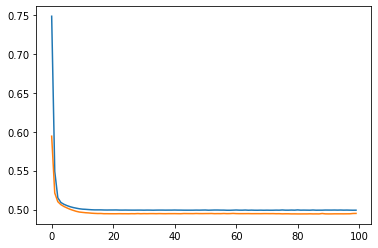

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

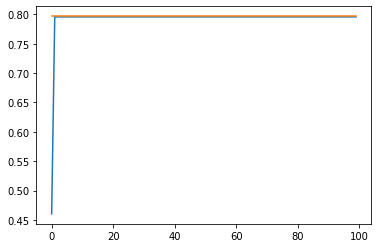

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [28]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "CreditScore" is
 850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
-------------------------------------------------
unique values in column "Age" is
 37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
-------------------------------------------------
unique values in column "Tenure" is
 2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
-------------------------------------------------
unique values in column "Balance" is
 0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

In [29]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [30]:
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [31]:
object_col

[]

In [32]:
df.mean()

CreditScore             650.528800
Age                      38.921800
Tenure                    5.012800
Balance               76485.889288
NumOfProducts             1.530200
HasCrCard                 0.705500
IsActiveMember            0.515100
EstimatedSalary      100090.239881
Exited                    0.203700
Geography_Germany         0.250900
Geography_Spain           0.247700
Gender_Male               0.545700
dtype: float64

In [33]:
df.max()

CreditScore             850.00
Age                      92.00
Tenure                   10.00
Balance              250898.09
NumOfProducts             4.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      199992.48
Exited                    1.00
Geography_Germany         1.00
Geography_Spain           1.00
Gender_Male               1.00
dtype: float64

In [34]:
df.min()

CreditScore          350.00
Age                   18.00
Tenure                 0.00
Balance                0.00
NumOfProducts          1.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary       11.58
Exited                 0.00
Geography_Germany      0.00
Geography_Spain        0.00
Gender_Male            0.00
dtype: float64

In [35]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [36]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [37]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,12.0,0.084547,0.288557,-0.027094,-0.003134,0.002811,0.007761,1.0
Age,12.0,0.112767,0.292501,-0.030680,-0.010428,-0.002825,0.056541,1.0
Tenure,12.0,0.083173,0.289077,-0.028362,-0.010561,0.002355,0.013766,1.0
Balance,12.0,0.091903,0.328347,-0.304180,-0.012905,0.009177,0.050864,1.0
NumOfProducts,12.0,0.053897,0.310747,-0.304180,-0.024064,0.006111,0.012539,1.0
HasCrCard,12.0,0.080638,0.289748,-0.014858,-0.011757,-0.006298,0.006969,1.0
IsActiveMember,12.0,0.076805,0.296039,-0.156128,-0.014021,-0.000236,0.023321,1.0
EstimatedSalary,12.0,0.084387,0.288510,-0.011421,-0.007429,0.003200,0.012272,1.0
Exited,12.0,0.098173,0.309223,-0.156128,-0.049032,-0.010569,0.132272,1.0
Geography_Germany,12.0,0.104977,0.326498,-0.332084,-0.012936,0.007917,0.078545,1.0


In [39]:
import seaborn as sns

<AxesSubplot:>

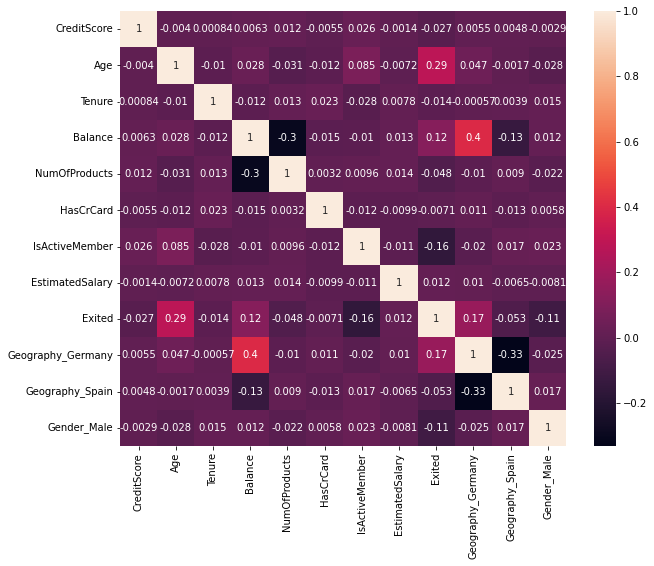

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [43]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [44]:
import dtale
dtale.show(df)

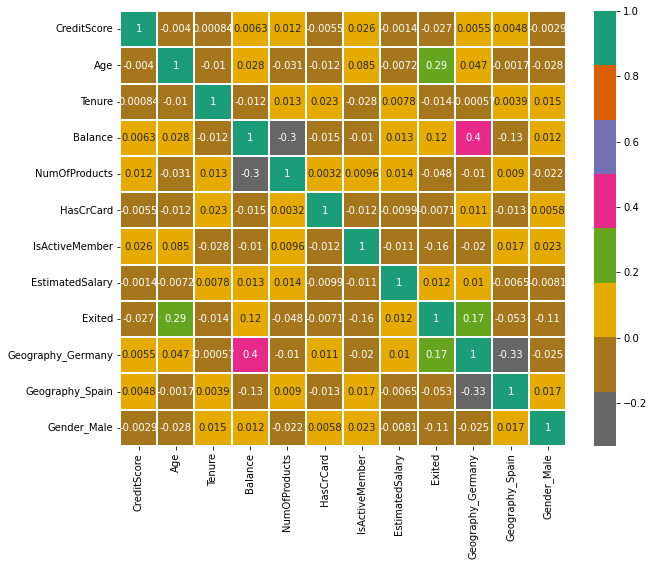

In [45]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

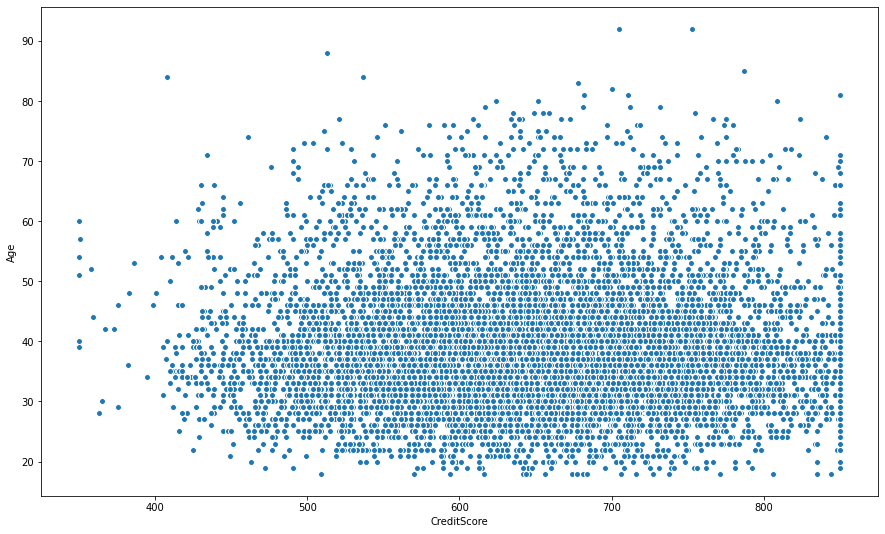

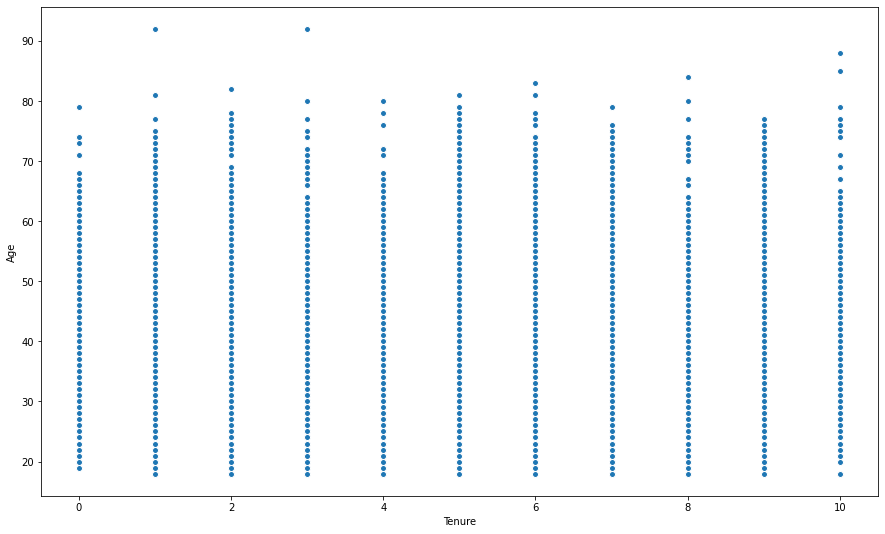

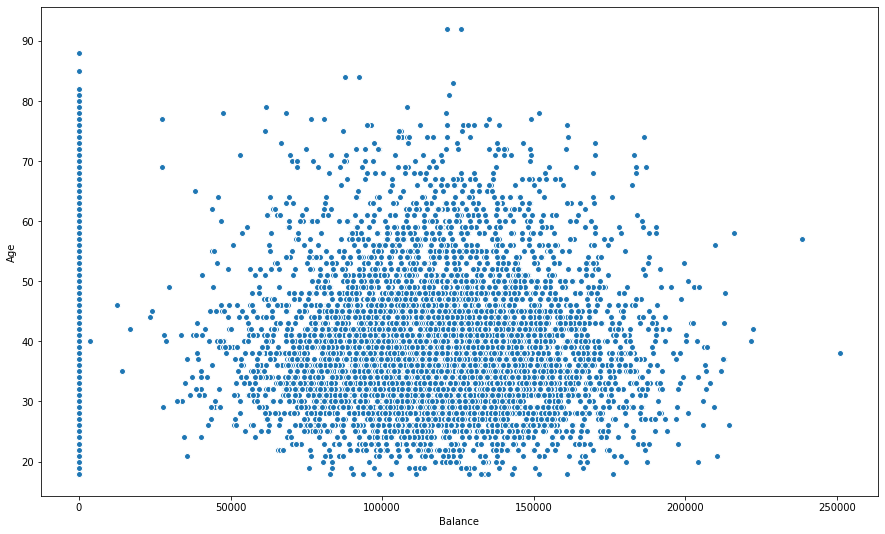

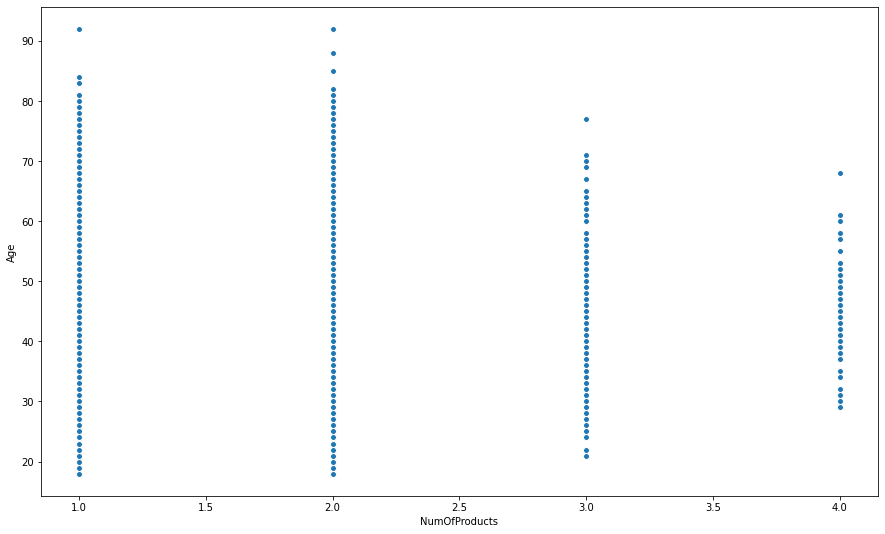

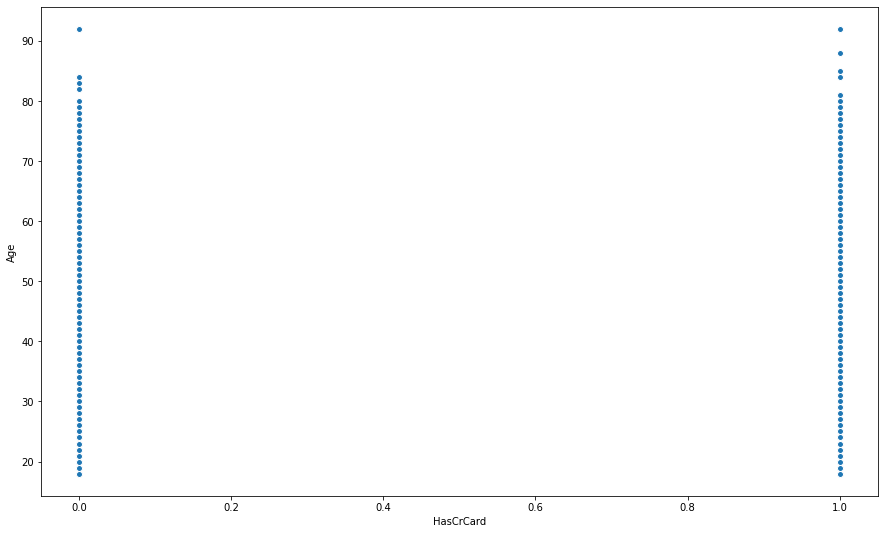

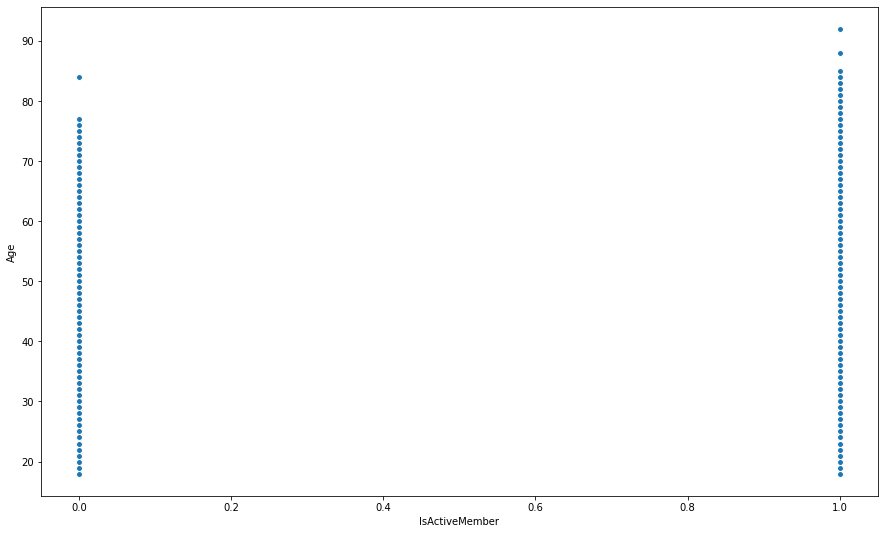

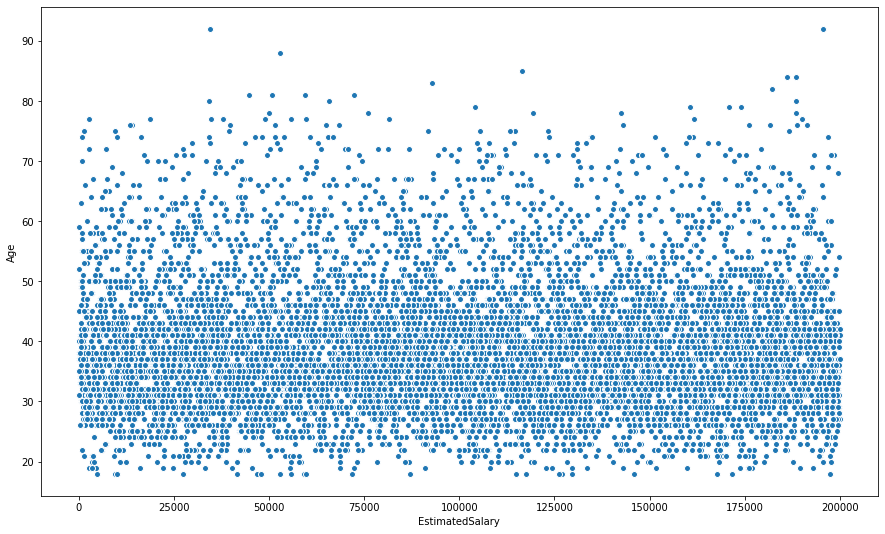

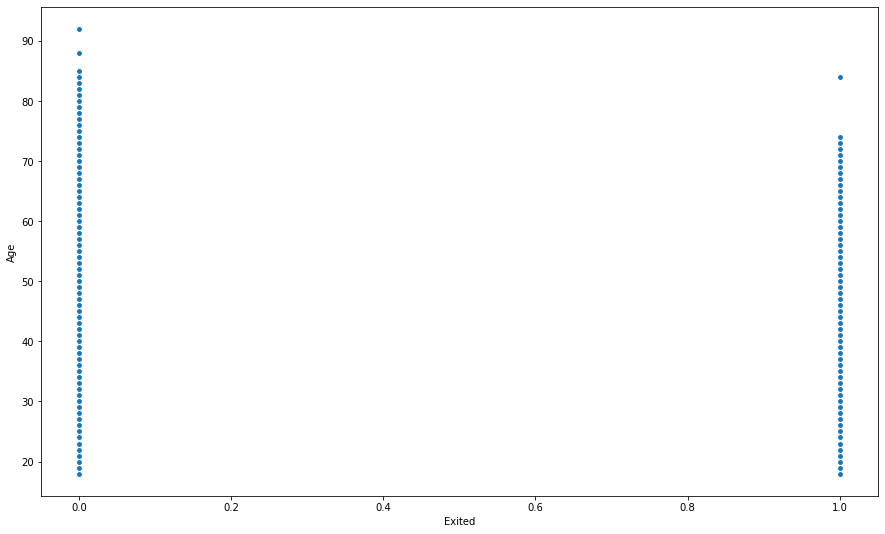

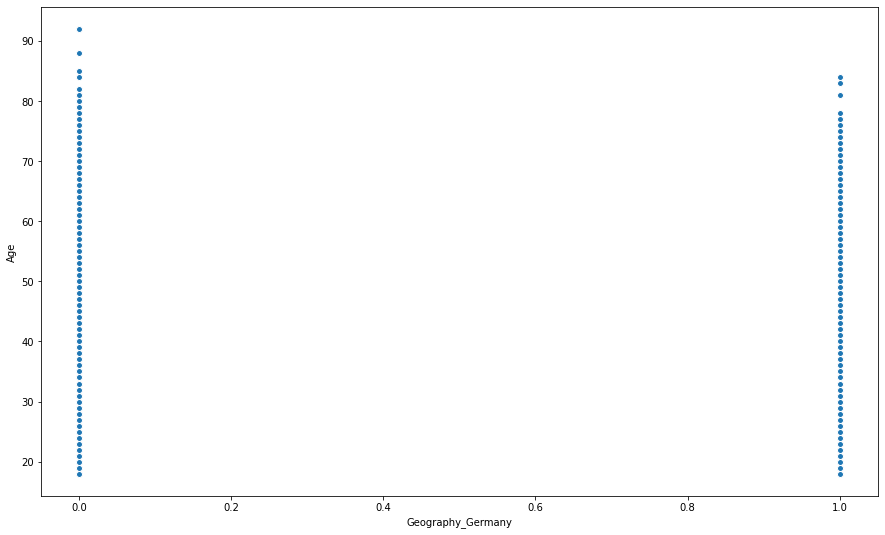

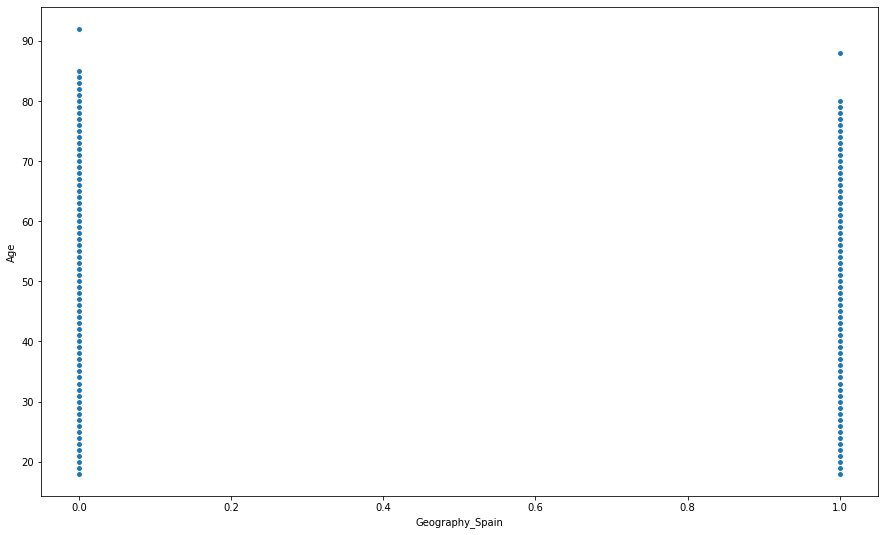

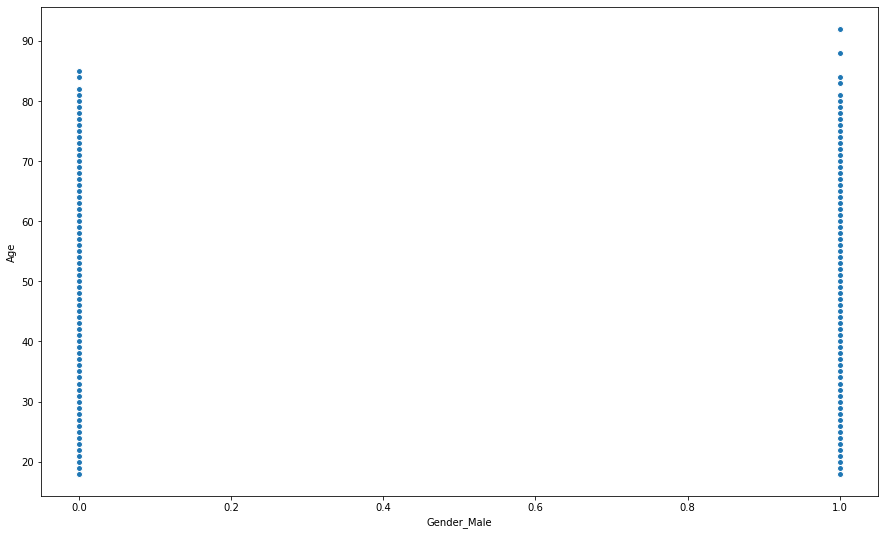

In [46]:
for i in ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(y=df.Age,x=df[i],data=df,linewidth=1,)
    plt.show()

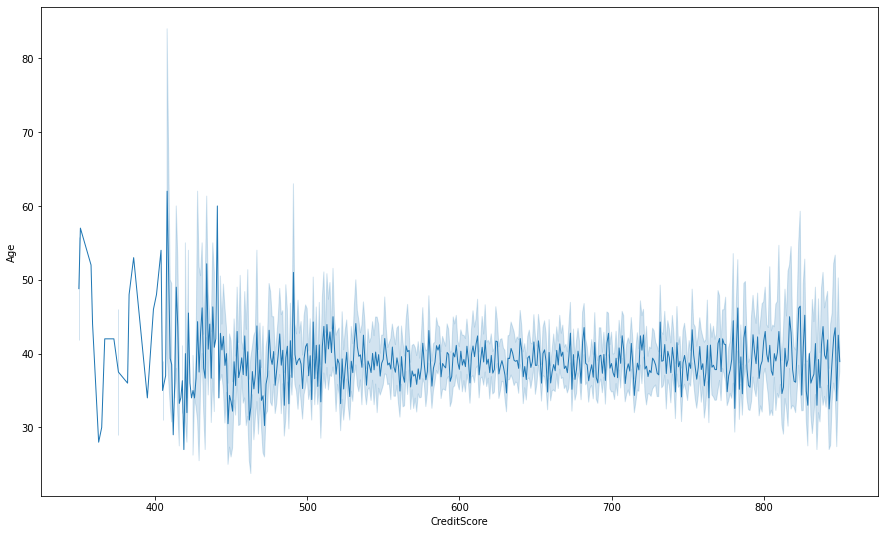

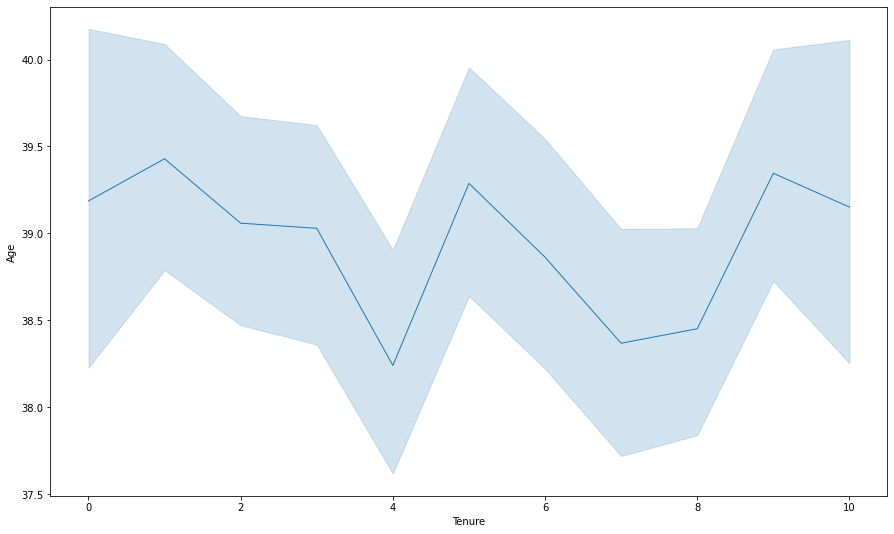

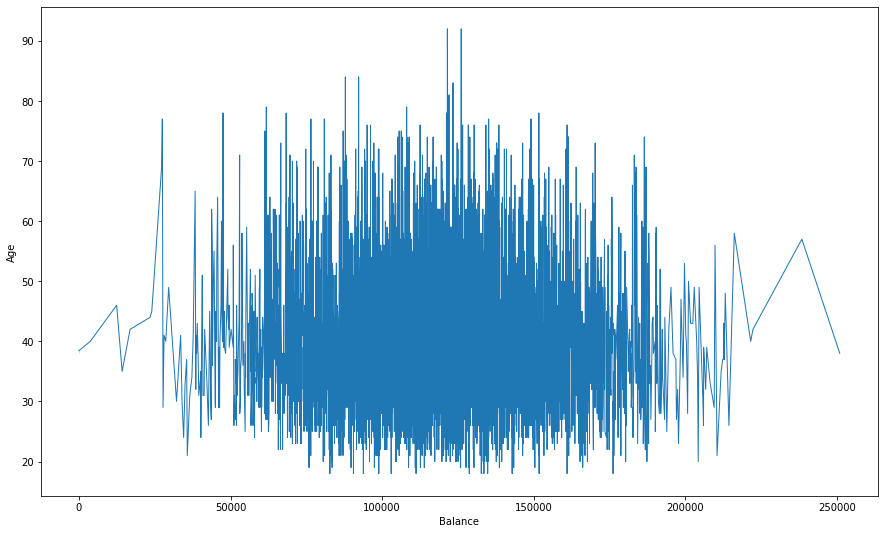

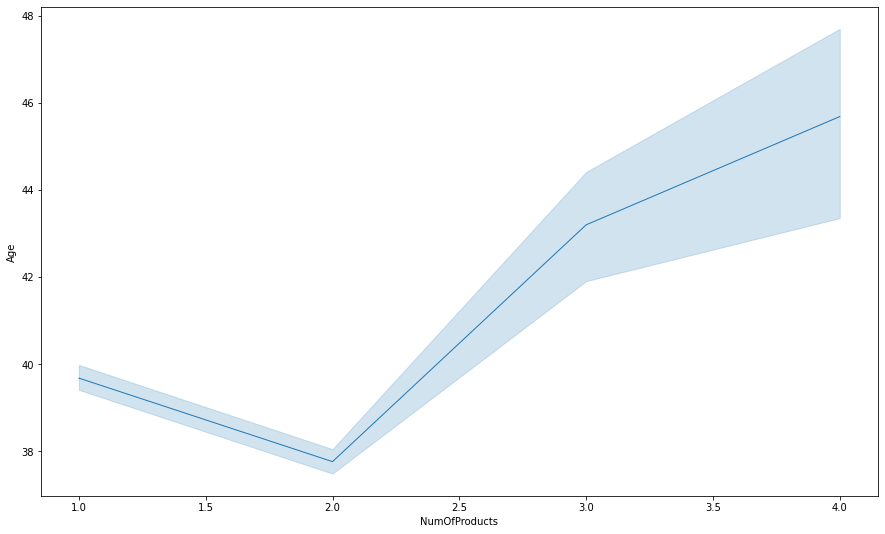

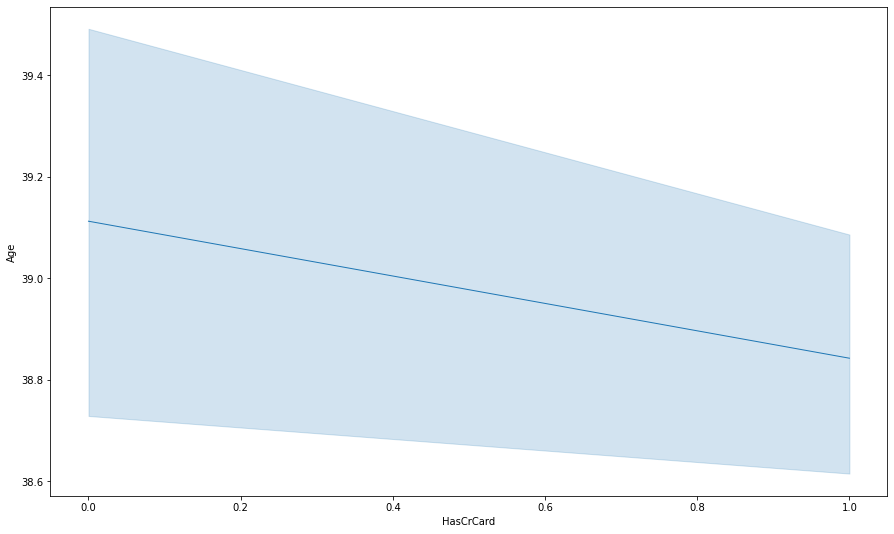

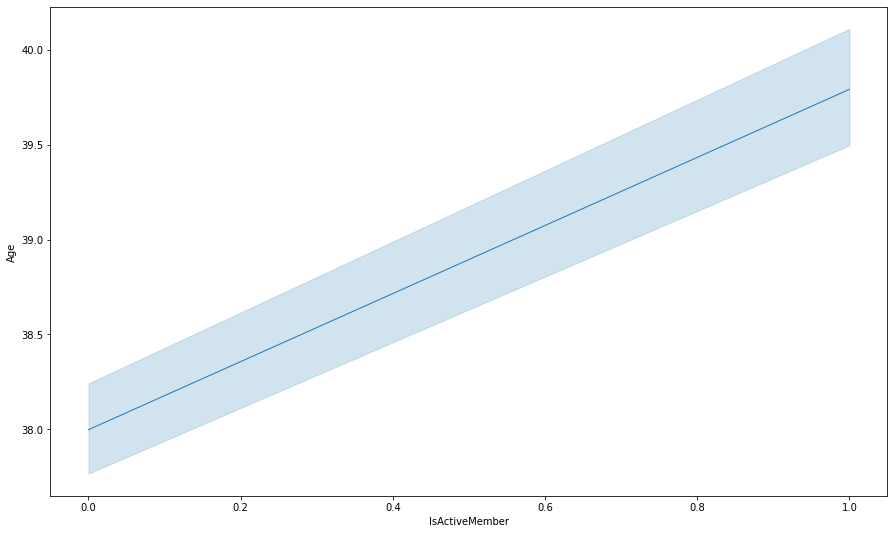

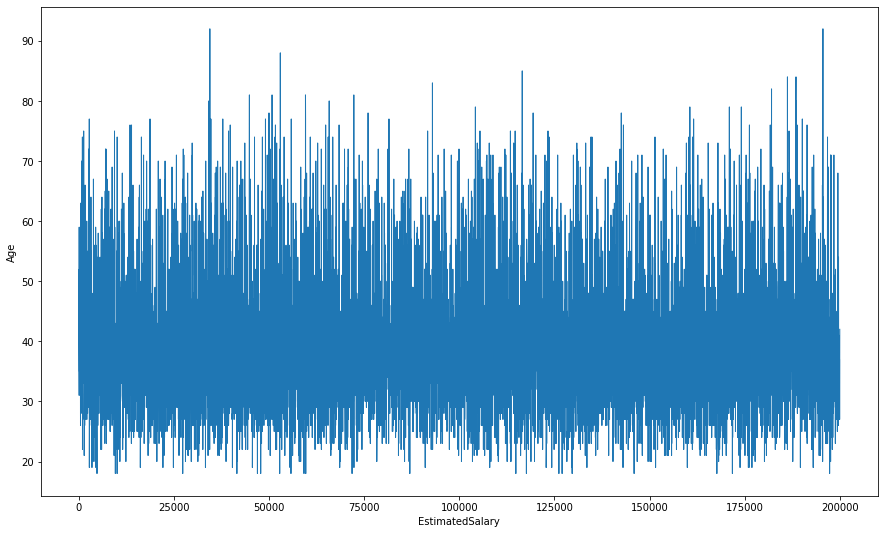

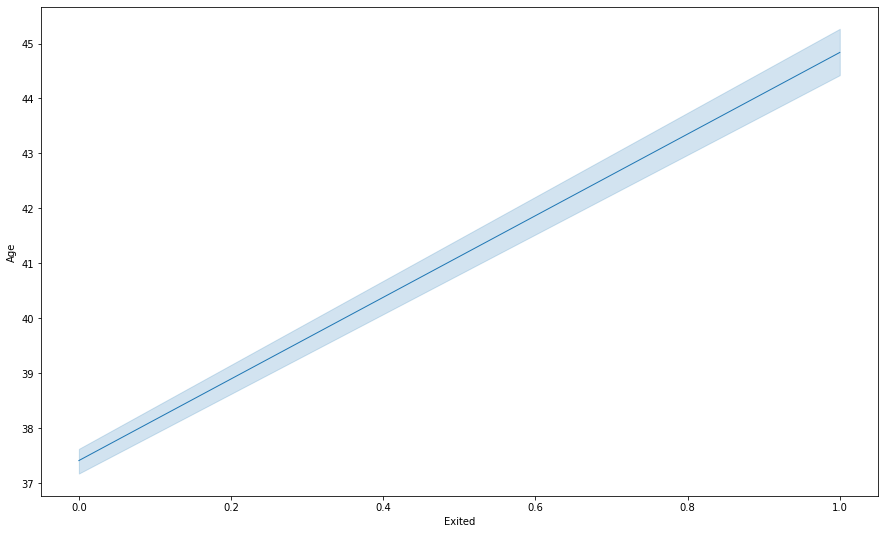

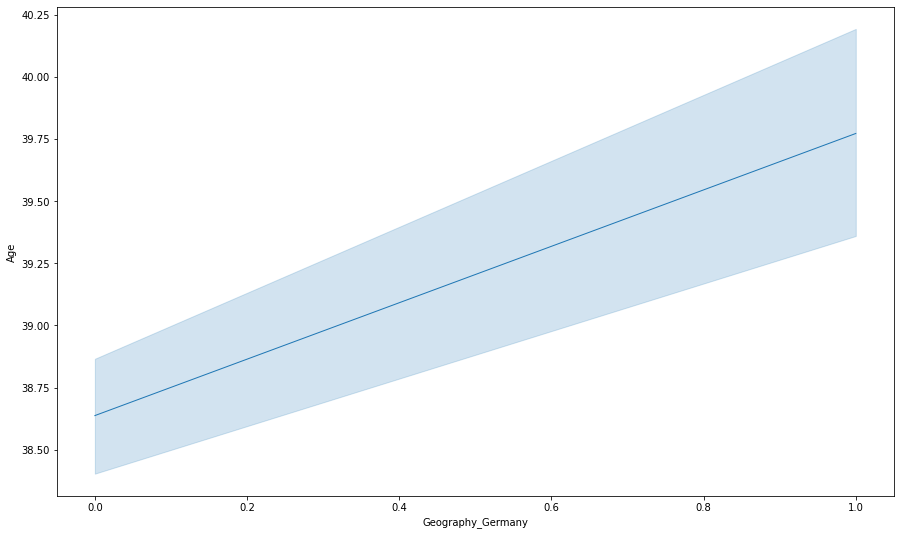

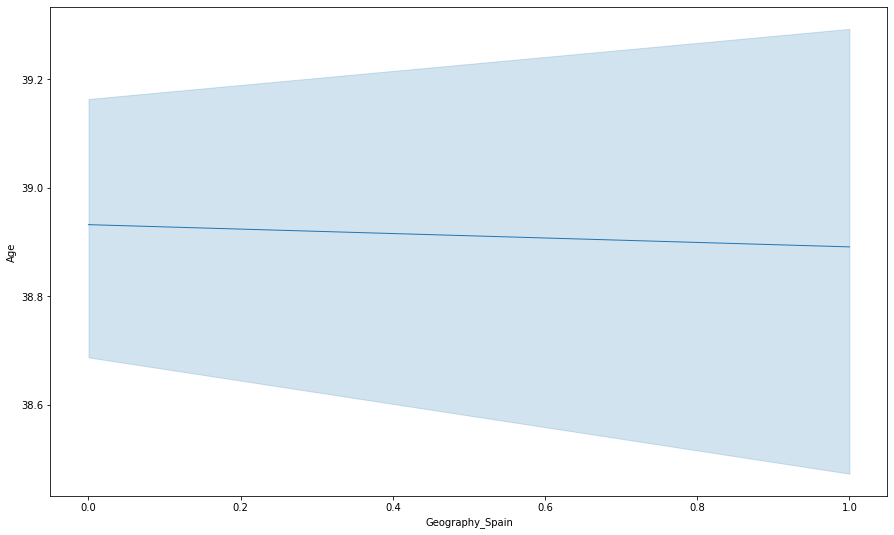

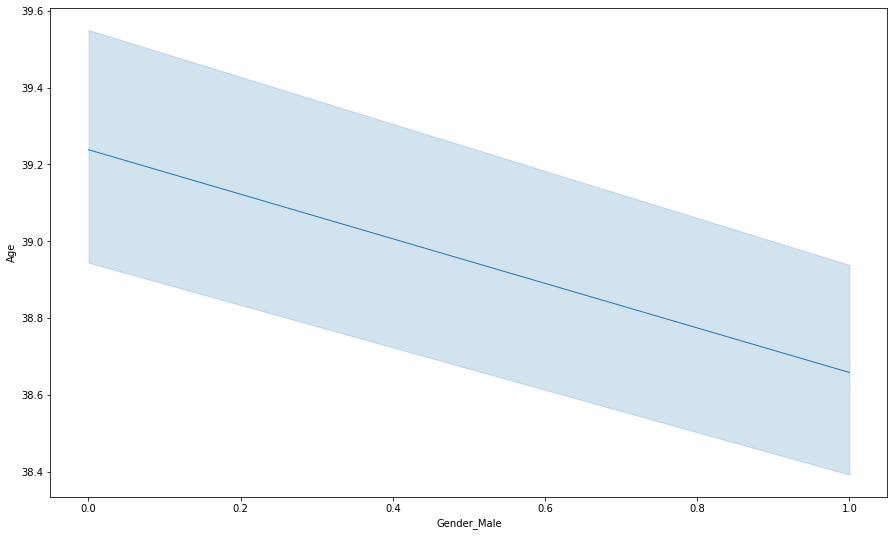

In [49]:
for i in ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']:
    plt.figure(figsize=(15,9))
    sns.lineplot(y=df.Age,x=df[i],data=df,linewidth=1,)
    plt.show()

<Figure size 1500x900 with 0 Axes>

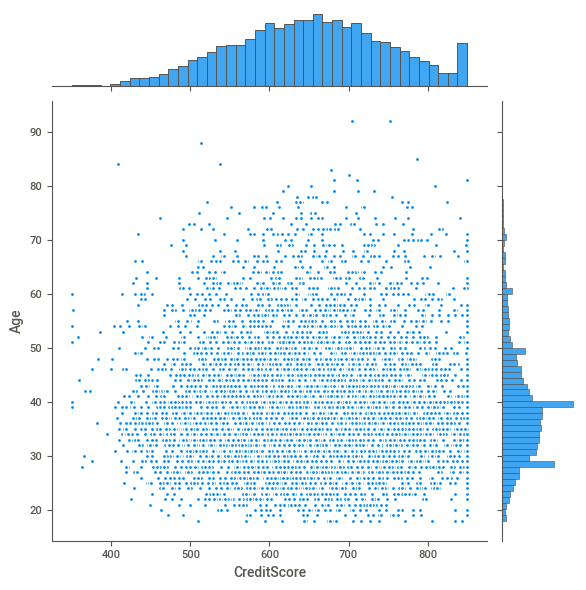

<Figure size 1500x900 with 0 Axes>

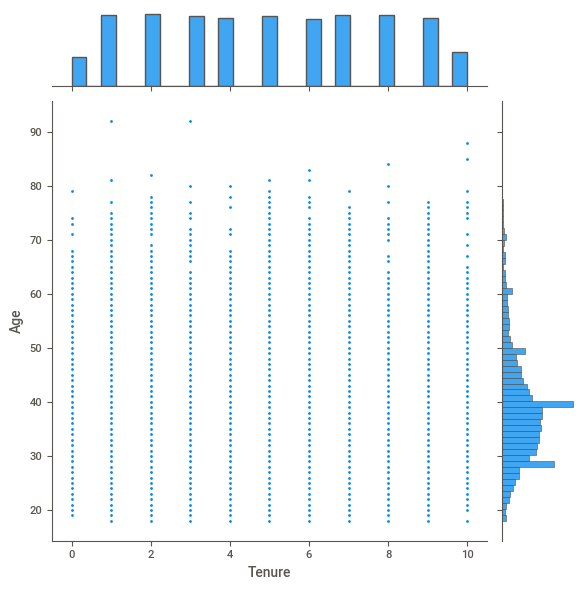

<Figure size 1500x900 with 0 Axes>

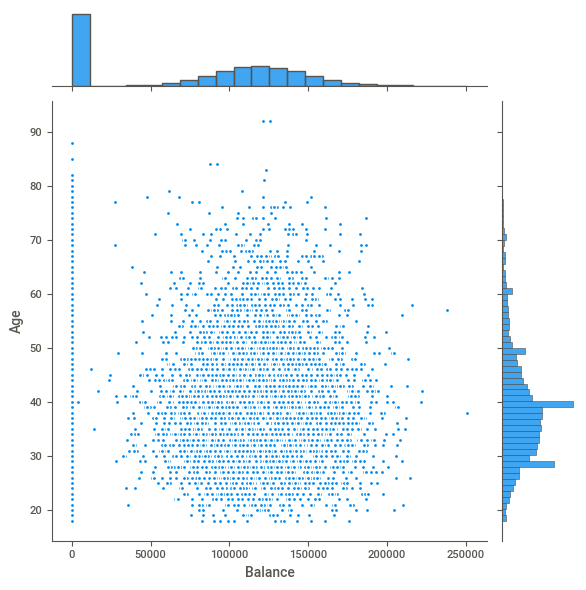

<Figure size 1500x900 with 0 Axes>

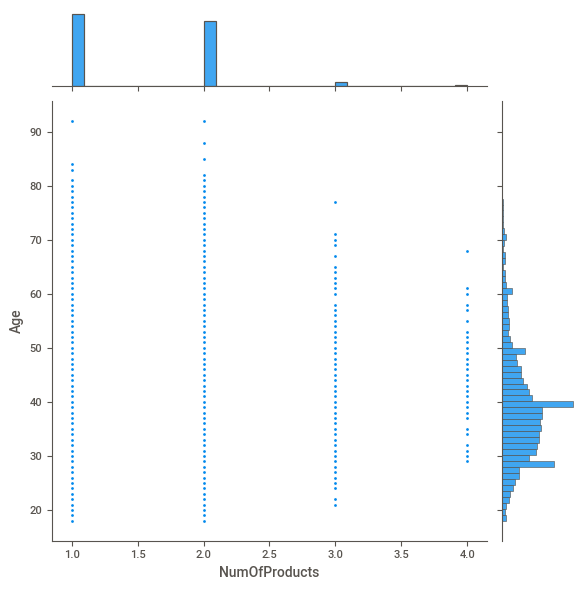

<Figure size 1500x900 with 0 Axes>

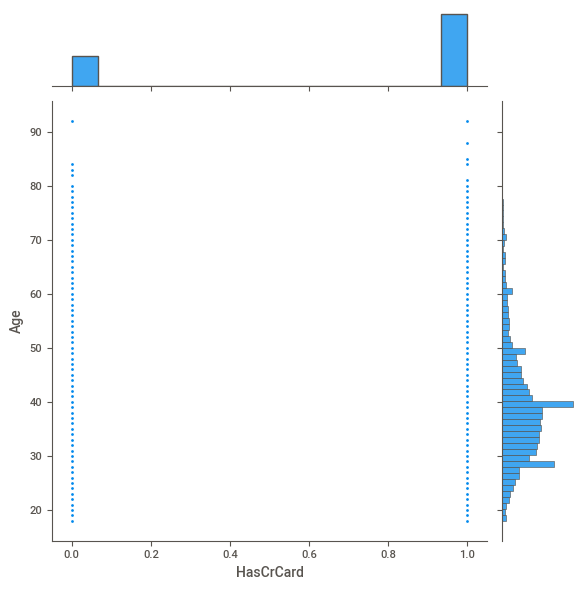

<Figure size 1500x900 with 0 Axes>

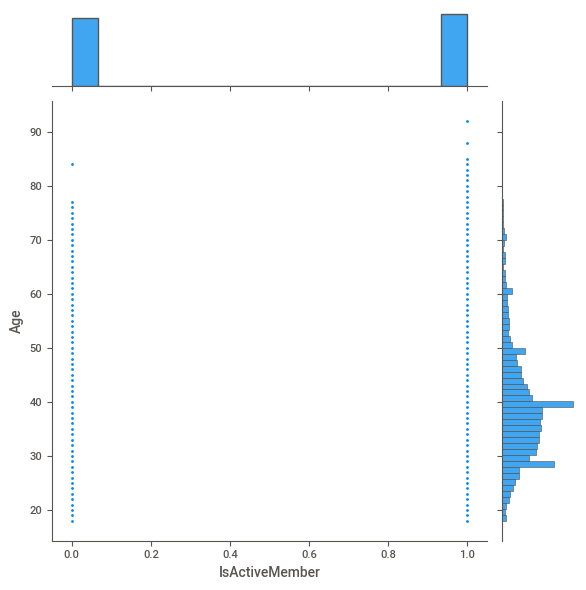

<Figure size 1500x900 with 0 Axes>

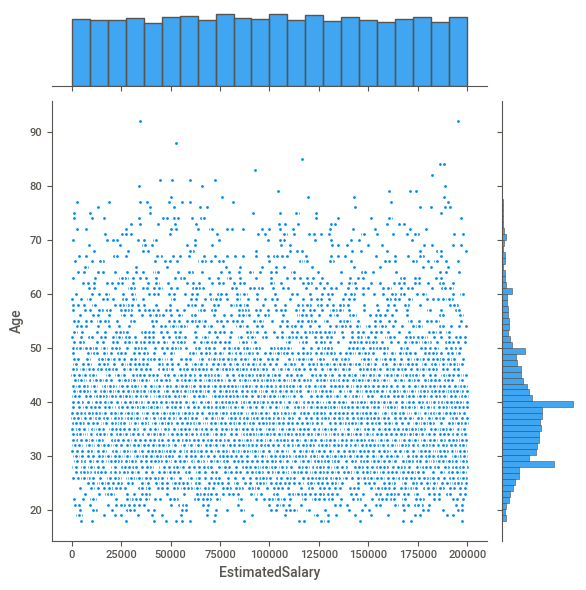

<Figure size 1500x900 with 0 Axes>

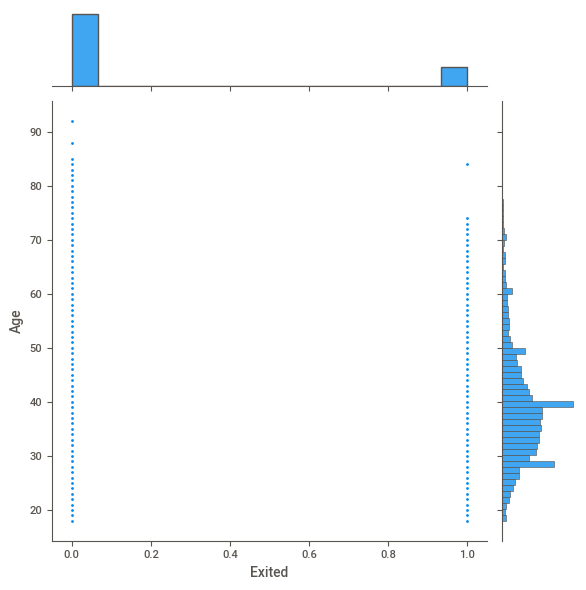

<Figure size 1500x900 with 0 Axes>

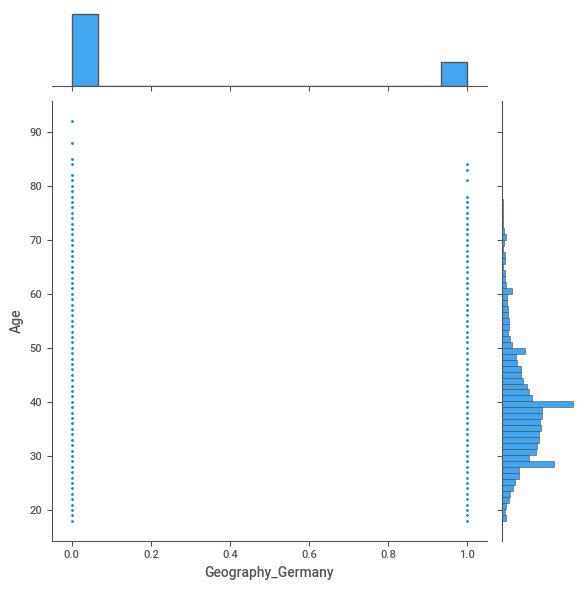

<Figure size 1500x900 with 0 Axes>

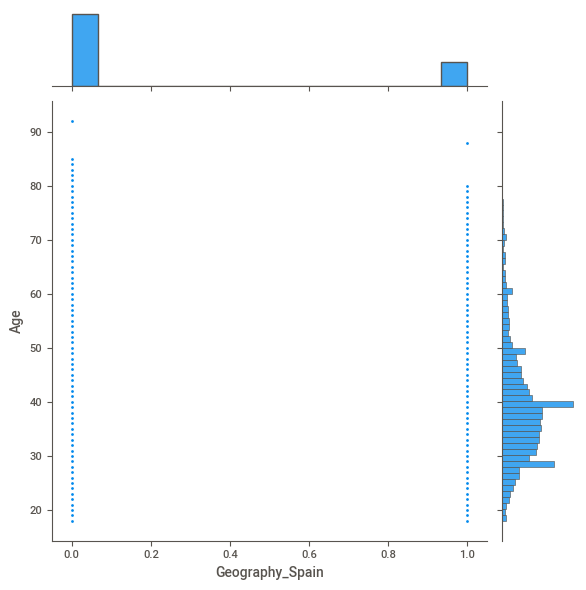

<Figure size 1500x900 with 0 Axes>

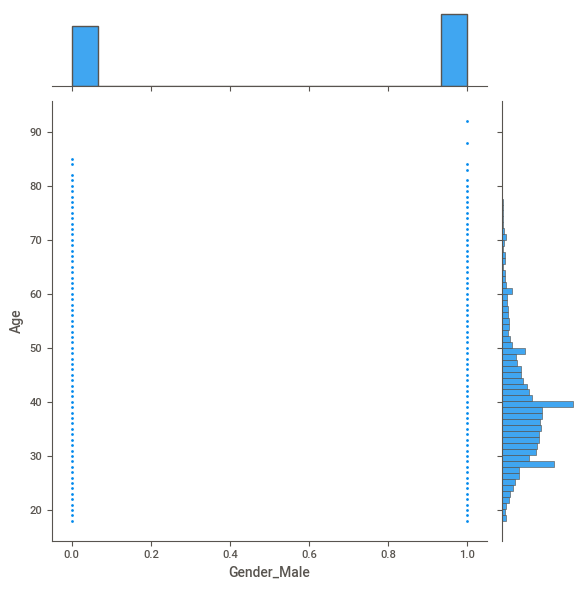

In [56]:
for i in ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']:
    plt.figure(figsize=(15,9))
    sns.jointplot(y=df.Age,x=df[i],data=df,linewidth=1)
    plt.show()

In [50]:
import sweetviz as sv
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [51]:
from IPython.display import IFrame

In [53]:
IFrame(src='Analyze.html',width=1000,height=600)

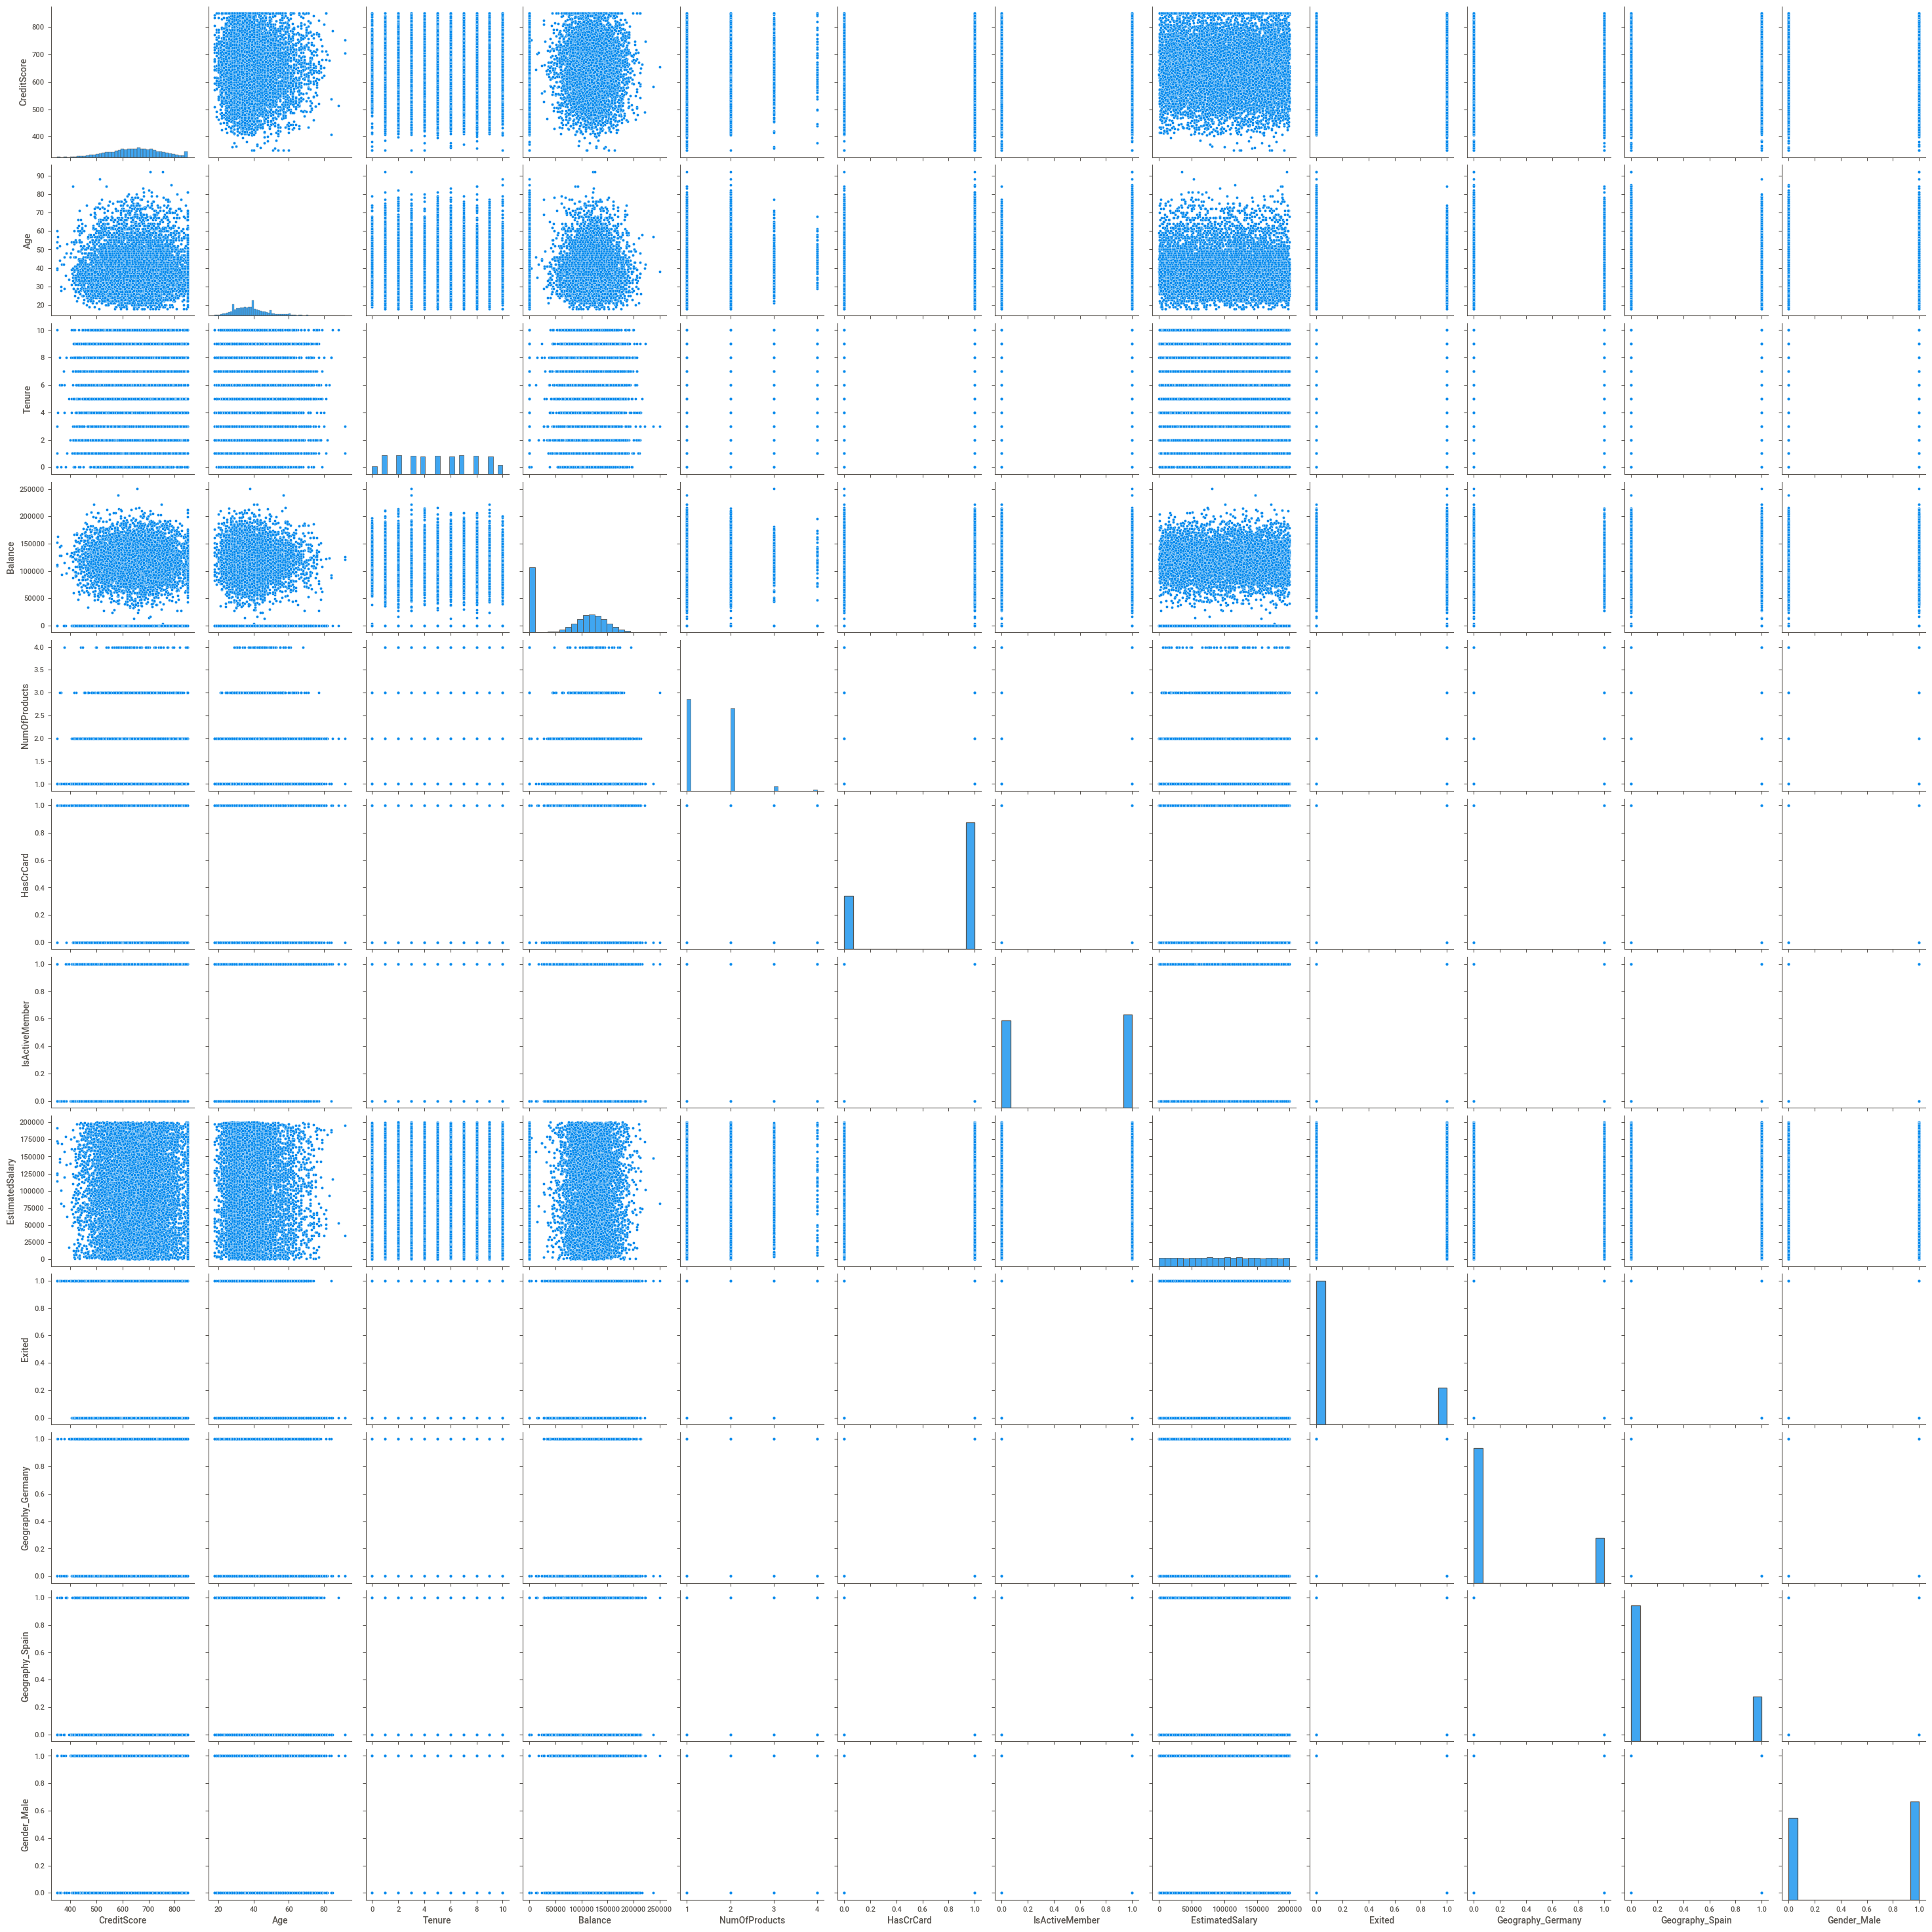

Executing shutdown due to inactivity...


2022-03-15 20:07:26,799 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-03-15 20:07:30,908 - INFO     - Executing shutdown...


In [57]:
sns.pairplot(df)